In [12]:
from scipy import stats
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns

exported_data = pd.read_json(r"db_export/export.json")

In [13]:
right = (exported_data[exported_data['noteType'] == 0]) #Tutte le note con la destra
left = (exported_data[exported_data['noteType'] == 1]) #Tutte le note con la sinistra

In [14]:
#Tutte le note innerlane destre
right_inner = pd.concat([right[right['index'] == 2], right[right['index'] == 6], right[right['index'] == 10]])
#Tutte le note innerlane sinistre
left_inner = pd.concat([left[left['index'] == 1], left[left['index'] == 5], left[left['index'] == 9]])
#Tutte le note outerlane destre
right_outer = pd.concat([right[right['index'] == 3], right[right['index'] == 7], right[right['index'] == 11]])
#Tutte le note outerlane sinistre
left_outer = pd.concat([left[left['index'] == 0], left[left['index'] == 4], left[left['index'] == 8]])

right_inner_down = pd.concat([right_inner[right_inner['noteDirection'] == 1], 
                             right_inner[right_inner['noteDirection'] == 6], 
                             right_inner[right_inner['noteDirection'] == 7]])

right_inner_up = pd.concat([right_inner[right_inner['noteDirection'] == 0], 
                            right_inner[right_inner['noteDirection'] == 4], 
                            right_inner[right_inner['noteDirection'] == 5]])

In [40]:
right_outer.corrwith(right_outer['distanceToCenter']).round(4).dropna()

noteDirection       0.1001
index               0.1346
id                  0.1421
time               -0.0541
multiplier          0.0171
timeDeviation      -0.1541
speed               0.3187
preswing           -0.1138
postswing           0.0032
distanceToCenter    1.0000
timeDependence      0.0336
score/0            -0.0337
score/1            -0.9885
score/2            -0.0427
noteCenter/0       -0.0000
noteCenter/1        0.1327
noteCenter/2       -0.0454
noteRotation/0      0.1414
noteRotation/1      0.0944
noteRotation/2      0.0982
cutPoint/0         -0.1946
cutPoint/1          0.1386
cutPoint/2         -0.0469
saberDir/0         -0.1036
saberDir/1          0.0756
saberDir/2          0.0072
cutNormal/0         0.0764
cutNormal/1         0.0556
cutNormal/2        -0.0259
dtype: float64

In [16]:
left_inner.corrwith(left_inner['distanceToCenter']).round(4).dropna()

noteDirection      -0.0406
index               0.1383
id                  0.1158
time               -0.0336
multiplier          0.0032
timeDeviation       0.0995
speed               0.2606
preswing           -0.0428
postswing          -0.0383
distanceToCenter    1.0000
timeDependence      0.1213
score/0            -0.0001
score/1            -0.9897
score/2             0.0062
noteCenter/0       -0.0000
noteCenter/1        0.1373
noteCenter/2        0.2240
noteRotation/0      0.1407
noteRotation/1      0.2133
noteRotation/2     -0.0531
cutPoint/0         -0.4527
cutPoint/1          0.1194
cutPoint/2          0.2016
saberDir/0         -0.1195
saberDir/1          0.0534
saberDir/2         -0.0392
cutNormal/0         0.0333
cutNormal/1         0.1012
cutNormal/2        -0.0468
dtype: float64

<AxesSubplot:xlabel='timeDeviation', ylabel='distanceToCenter'>

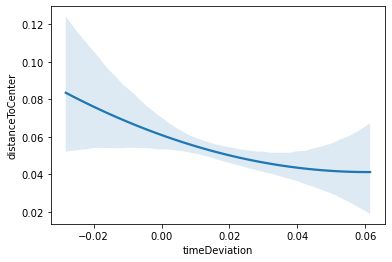

In [17]:
sns.regplot(x = right_inner_down['timeDeviation'], y = right_inner_down['distanceToCenter'], scatter=False, order = 2)


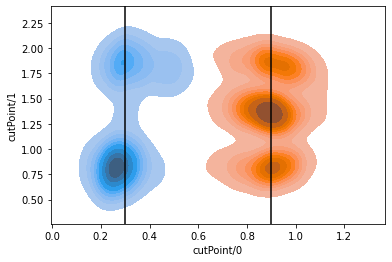

In [34]:
fig, ax = plt.subplots()
sns.kdeplot(y = right_inner['cutPoint/1'], x = right_inner['cutPoint/0'], fill = True, ax = ax)
sns.kdeplot(y = right_outer['cutPoint/1'], x = right_outer['cutPoint/0'], fill = True, ax = ax)
plt.axvline(x = 0.3, color = 'black')
plt.axvline(x = 0.9, color = 'black')

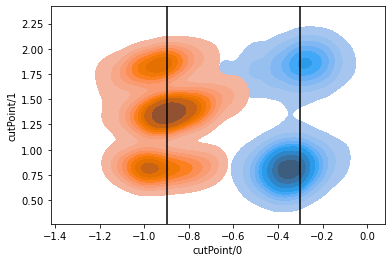

In [35]:
sns.kdeplot(y = left_inner['cutPoint/1'], x = left_inner['cutPoint/0'], fill = True)
sns.kdeplot(y = left_outer['cutPoint/1'], x = left_outer['cutPoint/0'], fill = True)
plt.axvline(x = -0.3, color = 'black')
plt.axvline(x = -0.9, color = 'black')

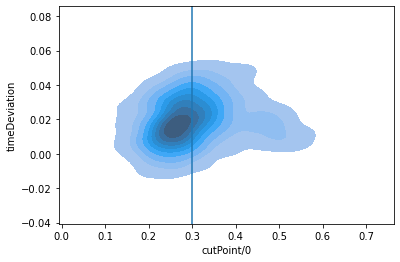

In [19]:
sns.kdeplot(y = right_inner['timeDeviation'], x = right_inner['cutPoint/0'], fill = True)
plt.axvline(x = 0.3)

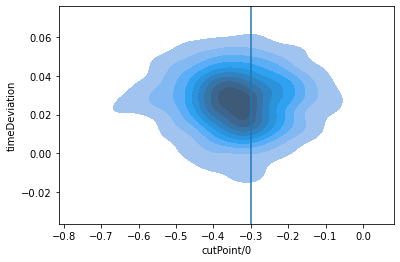

In [20]:
sns.kdeplot(y = left_inner['timeDeviation'], x = left_inner['cutPoint/0'], fill = True)
plt.axvline(x = -0.3)

In [42]:
left_outer['distanceToCenter'].std()

0.09599306616897027

In [38]:
right_inner['cutPoint/0'].describe()

count    944.000000
mean       0.296690
std        0.080601
min        0.070772
25%        0.247503
50%        0.282797
75%        0.328697
max        0.686132
Name: cutPoint/0, dtype: float64